In [1]:
import cv2
import matplotlib as plt
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

img_path = '../data/kkj/kkj04_lipsync3d/crop/00003.png'
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:

    image = cv2.imread(img_path)
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for idx, landmark in enumerate(results.multi_face_landmarks[0].landmark):
          print('idx: {}, landmark: {}'.format(idx, landmark))

    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          landmark_drawing_spec=drawing_spec,
          connections=None,
          connection_drawing_spec=None)
        
        nose = face_landmarks.landmark[2]
        left_eye = face_landmarks.landmark[130]
        right_eye = face_landmarks.landmark[359]

        image_rows, image_cols, _ = image.shape
        nose = mp_drawing._normalized_to_pixel_coordinates(nose.x, nose.y, image_cols, image_rows)
        left_eye = mp_drawing._normalized_to_pixel_coordinates(left_eye.x, left_eye.y, image_cols, image_rows)
        right_eye = mp_drawing._normalized_to_pixel_coordinates(right_eye.x, right_eye.y, image_cols, image_rows)

        cv2.circle(annotated_image, nose, 2, mp_drawing.RED_COLOR, 2)
        cv2.circle(annotated_image, left_eye, 2, mp_drawing.RED_COLOR, 2)
        cv2.circle(annotated_image, right_eye, 2, mp_drawing.RED_COLOR, 2)

    cv2.imwrite('annotated_image.png', annotated_image)

idx: 0, landmark: x: 0.5957899689674377
y: 0.44643381237983704
z: -0.050491347908973694

idx: 1, landmark: x: 0.5920318961143494
y: 0.3926335871219635
z: -0.07664436101913452

idx: 2, landmark: x: 0.5941587686538696
y: 0.4120352864265442
z: -0.045612744987010956

idx: 3, landmark: x: 0.5788167715072632
y: 0.34754398465156555
z: -0.05007738620042801

idx: 4, landmark: x: 0.5909350514411926
y: 0.3768664002418518
z: -0.07927119731903076

idx: 5, landmark: x: 0.5903090834617615
y: 0.3585273325443268
z: -0.0709119588136673

idx: 6, landmark: x: 0.5894942283630371
y: 0.31734180450439453
z: -0.025578901171684265

idx: 7, landmark: x: 0.49803847074508667
y: 0.32494160532951355
z: 0.034920018166303635

idx: 8, landmark: x: 0.588245689868927
y: 0.2887633442878723
z: -0.010640733875334263

idx: 9, landmark: x: 0.5872071385383606
y: 0.27063417434692383
z: -0.009299964644014835

idx: 10, landmark: x: 0.5845979452133179
y: 0.2065565288066864
z: 0.019861901178956032

idx: 11, landmark: x: 0.596339046

Text(0.5, 1.0, 'Spectrogram (dB)')

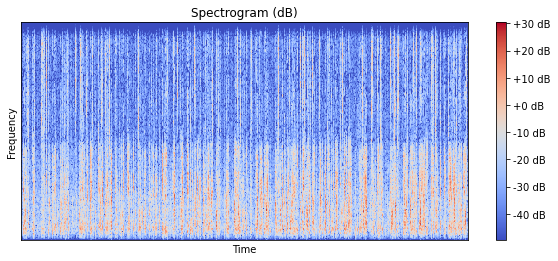

In [2]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt 

x = librosa.load('../data/kkj/kkj04_lipsync3d/audio/audio.wav',16000)[0]
y = librosa.stft(x, n_fft=510, hop_length=160, win_length=480)

magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=160)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

In [48]:
idx = 8
audio_data = torch.from_numpy(np.stack((y.real, y.imag)))
audio_feature_list = []
for i in range(idx - 12, idx + 12):
    if i < 0:
        audio_feature_list.append(audio_data[:, :, 0])
    elif i >= audio_data.shape[2]:
        audio_feature_list.append(audio_data[:, :, -1])
    else:
        audio_feature_list.append(audio_data[:, :, i])


In [3]:
from utils import mesh_tensor_to_landmarkdict
import torch

A = torch.rand(478, 3)
mesh_tensor_to_landmarkdict(A)

{0: [0.19173192977905273, 0.5041244029998779, 0.34532445669174194],
 1: [0.5647398233413696, 0.7140663862228394, 0.47745227813720703],
 2: [0.018235623836517334, 0.8999500870704651, 0.3458786606788635],
 3: [0.038815200328826904, 0.9534047245979309, 0.7518898248672485],
 4: [0.2568892240524292, 0.2613976001739502, 0.5548368692398071],
 5: [0.6424738168716431, 0.9548833966255188, 0.06694746017456055],
 6: [0.7013173699378967, 0.9157471656799316, 0.03606748580932617],
 7: [0.6419553756713867, 0.11531132459640503, 0.9333806037902832],
 8: [0.3151255249977112, 0.3598438501358032, 0.6551591753959656],
 9: [0.776134729385376, 0.7713097929954529, 0.36695849895477295],
 10: [0.9036917686462402, 0.7517568469047546, 0.7463865876197815],
 11: [0.08849817514419556, 0.7234265804290771, 0.7531523704528809],
 12: [0.26073604822158813, 0.3409179449081421, 0.8385000228881836],
 13: [0.25587594509124756, 0.7646175622940063, 0.8071076273918152],
 14: [0.6495696306228638, 0.07838302850723267, 0.9903365373